# Part I: Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

In [2]:
login = pd.read_json('logins.json')
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
login.head(10)

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
5 1970-01-01 20:21:41
6 1970-01-01 20:12:16
7 1970-01-01 20:35:47
8 1970-01-01 20:35:38
9 1970-01-01 20:47:52

In [4]:
#sort the login time first
sorted_login = sorted(login.login_time)

delta = timedelta(minutes = 15)
interval = sorted_login[0]+delta
time_interval = []
count = 0
for time in sorted_login[1:]:
    #condition if interval is less than 15
    if time <= interval:
        count+=1
    #coindition when interval is higher than 15
    while time > interval:
        time_interval.append(count)
        count=0
        interval += delta

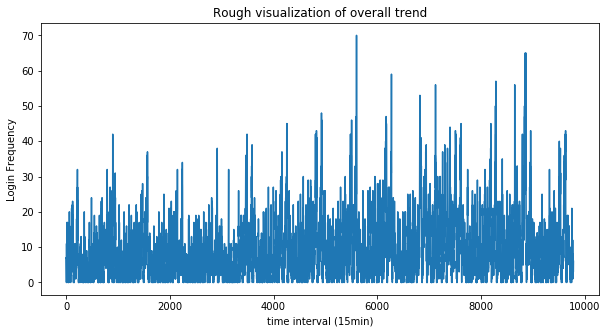

In [5]:
plt.figure(figsize = (10,5))
plt.plot(time_interval)
plt.title('Rough visualization of overall trend')
plt.xlabel('time interval (15min)')
plt.ylabel('Login Frequency')
plt.show()

The plot shows a clear periodic trend at roughly one week by calculations. The data obtained between 7000 and 8000 15min time interval seems to deviate from the overall trend

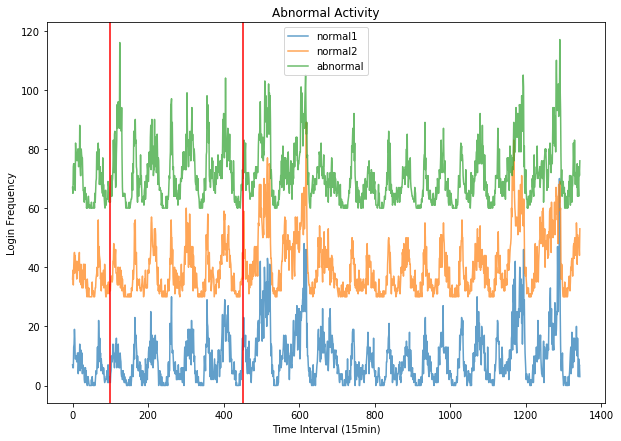

In [6]:
biweek = 2*4*24*7
plt.figure(figsize = (10,7))
plt.plot(time_interval[7000-2*biweek:7000-biweek], label = 'normal1', alpha = 0.7)
plt.plot(np.array(time_interval[7000-biweek:7000])+30, label = 'normal2', alpha = 0.7)
plt.plot(np.array(time_interval[7000:7000+biweek])+60, label = 'abnormal', alpha = 0.7)
plt.axvline(x = 100, color = 'r')
plt.axvline(x = 450, color = 'r')

plt.legend()
plt.xlabel('Time Interval (15min)')
plt.ylabel('Login Frequency')
plt.title('Abnormal Activity')
plt.show()

Overall the trend aligns well; however, the login frequency peak around 160 and 720 are particularly more intense in the abnormal plot. Also the region between 200 and 450 in the abnormal plot tends to be slightly more intense relatively to neighboring peaks, making the two peaks at 500 and 600 to be less intense relative to neighboring peak.

In [7]:
#what day of the week
print(login.login_time[0])
login.login_time[0].weekday()

1970-01-01 20:13:18


3

In [8]:
#15min time interval to midnight
time_to_midnight = 4+3

#time to monday from midnight
time_to_monday = 4*24*3

#total time to monday
total = time_to_midnight+time_to_monday

#remove data from time interval
time_interval = time_interval[total:]

In [9]:
#number of 15mins in a week
week = 24*4*7
week_interval = []
start = 0
length = len(time_interval)
#as long as the total length is smaller than the index + week
while start+week < length:
    #append the week list
    week_interval.append(time_interval[start:start+week])
    start+=week

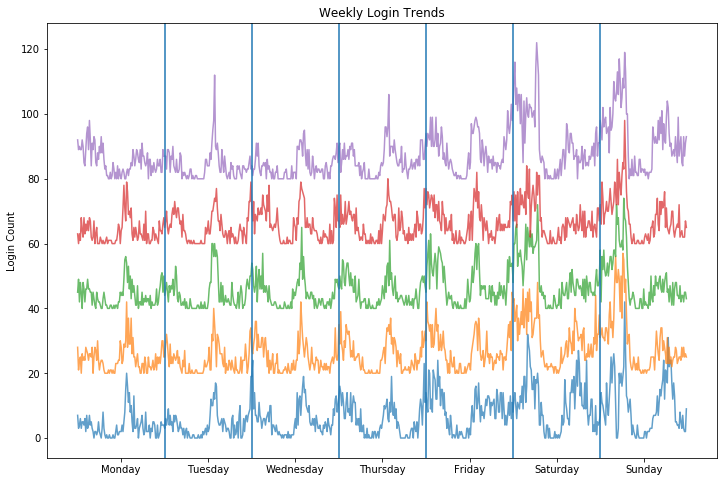

In [10]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
offset = 0
plt.figure(figsize = (12,8))
for one_week in week_interval[:5]:
    one_week= np.array(one_week)+offset
    offset+=20
    plt.plot(one_week, alpha = 0.7)

#create vertical line in plot
day = 4*24
midnight = day
for time in range(week):
    if time == midnight:
        plt.axvline(x=time)
        midnight+=day

#label x axis
midday = day/2
x=[]
for time in range(7):
    x.append(midday)
    midday+=day
plt.xticks(x, days)
plt.ylabel('Login Count')
plt.title('Weekly Login Trends')
plt.show()

The plot shows distinct weekly trend that follows through for 5 weeks. The login count seems to peak and trough at roughly the same location and login activity is heighten on weekends

In [11]:
#number of 15mins in a day
day = 24*4
day_interval = []
start = 0
length = len(time_interval)
#as long as the total length is smaller than the index + day
while start+day < length:
    #append the day list
    day_interval.append(time_interval[start:start+day])
    start+=day

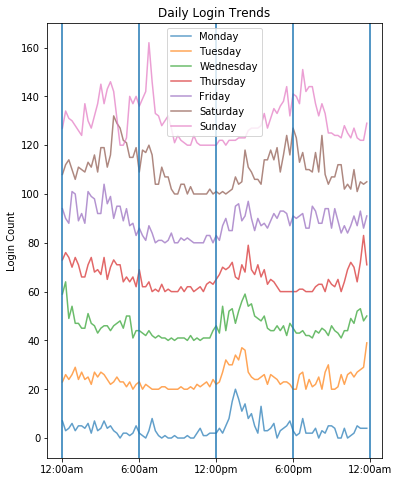

In [12]:
times = ['12:00am', '6:00am', '12:00pm', '6:00pm', '12:00am']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
offset = 0
count = 0
plt.figure(figsize = (6,8))
for day in day_interval[:7]:
    day = np.array(day)+offset
    offset+=20
    plt.plot(day, alpha = 0.7, label = days[count])
    count+=1

x = []
start =0
for hour6 in range(5):
    x.append(start)
    plt.axvline(x=start)
    start+=4*6
    
plt.legend()    
plt.xticks(x, times)
plt.ylabel('Login Count')
plt.title('Daily Login Trends')
plt.show()

Overall on weekdays there are 2 peaks at 2pm and 12am. On weekends, the 2 peak trends shifts to 6pm and 6am

# Part II: Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Since the managers of the city want to encourage driver partners to be availale in both cities, a useful metric would be the proportion drivers in Metropolis that are from another Gotham and proportion of drivers in Gotham that are from Metropolis. Proportion would show how much mixing have occurred. However, the ROI should be noted as well to measure how much return in profit resulted in the exchange of drivers, or a net decrease in profit have occurred. If encouraging drivers in both city is the only objective, we may ignore ROI.

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:<br>
    a. how you will implement the experiment<br>
    b. what statistical test(s) you will conduct to verify the significance of the observation<br>
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. <br>

a. Assuming we are selecting proportion to be the metric, the experiment could be implemented based on two approaches depending on the system infrastructure that have been put in place. Assuming we do have digital infrastruce in place, we can measure the success of the experiment by identifying the proportion of driver that are from Metropolis that are local from the database and are active in Metropolis. This proportion is measured again after 6 months of implementation of the experiment. This type of statistic is conducted in Gotham too.<br>
If, however, we do not have a digital infrastructure to monitor the change, we a survey could be done for random drivers prior and after implementing rebursement. This could be done through emails or phone at random for the statistics

b. As mentioned before, a one sided proportion hypothesis testing would be conducted to determine the significance of the observation

c. If the result indicates that there is a statistical shift in driver proportion, we can only say that there is a change. We now have to determine whether the change is signifcant enough based on our target. If the proportion do not hit our target, we have to consider other alternative incentives, but however if we believe that it has hit the target, we can conduct another null hypothesis based on bootstrappign to determine if our experiment is statistically within the range of the target. This experiment like mentioned before do not account for ROI and may experience decrease in profit. This implementation do not account for seasonal effects and it may be that drivers do tend to travel to the other side if it's the right season.

# Part III: Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json.

In [13]:
import json
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, roc_curve, classification_report

In [14]:
with open('ultimate_data_challenge.json') as openfile:
    challenge = json.load(openfile)

In [15]:
df = pd.DataFrame(challenge)
df.head(5)

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
#change data structure of dates to datetime
df['signup_date']= pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

#engineer feature for the difference in last day used and sign up date
df['day_signup'] = df['signup_date'].apply(lambda x: x.weekday())

In [18]:
#engineer features for missing rating 
df['missing_rating_of_driver'] = df['avg_rating_of_driver'].isnull()
df['missing_rating_by_driver'] = df['avg_rating_by_driver'].isnull()

In [19]:
#find the last day and use it as the assumption that the data was taken on that day
last = sorted(df['last_trip_date'])[-1]
preceded_30days = last - timedelta(days = 30)

#engineer feature for retention
df['retention'] = df.last_trip_date.apply(lambda x: True if x>preceded_30days else False)

In [20]:
#fill null values with averge
avg = np.mean(df.avg_rating_of_driver)
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(avg)

avg = np.mean(df.avg_rating_by_driver)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(avg)

#fill unknown phones with unknow variable
df['phone'] = df['phone'].fillna('unknown')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
city                        50000 non-null object
trips_in_first_30_days      50000 non-null int64
signup_date                 50000 non-null datetime64[ns]
avg_rating_of_driver        50000 non-null float64
avg_surge                   50000 non-null float64
last_trip_date              50000 non-null datetime64[ns]
phone                       50000 non-null object
surge_pct                   50000 non-null float64
ultimate_black_user         50000 non-null bool
weekday_pct                 50000 non-null float64
avg_dist                    50000 non-null float64
avg_rating_by_driver        50000 non-null float64
day_signup                  50000 non-null int64
missing_rating_of_driver    50000 non-null bool
missing_rating_by_driver    50000 non-null bool
retention                   50000 non-null bool
dtypes: bool(4), datetime64[ns](2), float64(6), int64(2), object(2)
memory usag

In [22]:
percentage = sum(df.retention)/len(df.retention)*100
print('Percentage retained: {:.1f}%'.format(percentage))

Percentage retained: 36.6%


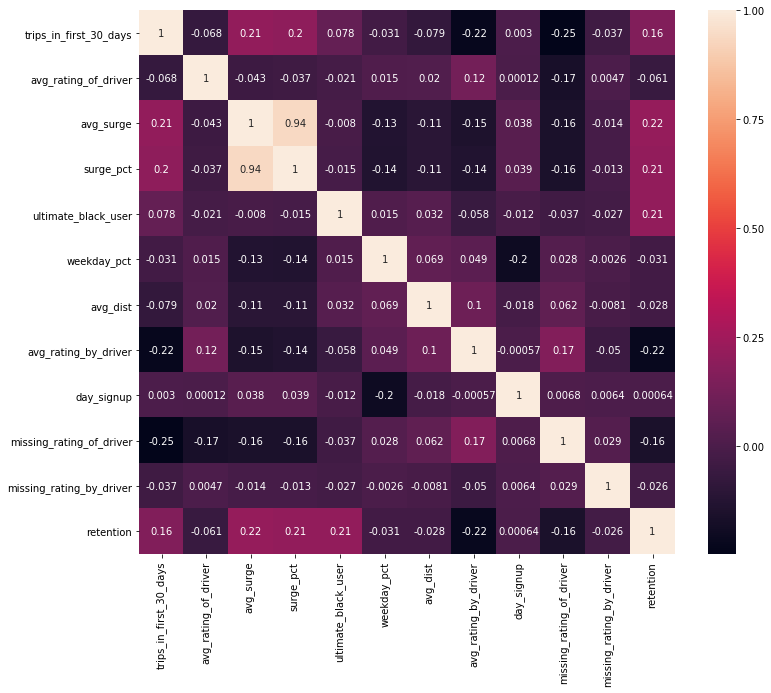

In [23]:
plt.figure(figsize = (12,10))
#use kendall correlation to account for possible ranking association
cor = df.corr(method = 'kendall')
sns.heatmap(cor, annot = True)

The heatmap shows the kendall correlation between all features. In particular retention has better correlation with missing rating of driver, avg_rating by driver, ultimate black user, surge percentage, avg surge, and trips in the first 30 days. Other features have correlation less than 0.1. However, it should be noted that some of these features have weak dependencies on other features.  We will ignore them for now. However surge percentage and avg sure is strongly related and must be dropped from predicative modeling to maintain independence

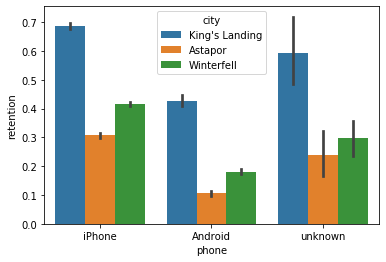

In [24]:
sns.barplot(x = 'phone', y = 'retention', data = df, hue = 'city')

Phone plays a strong role in determining retention. As seen in the diagram above, retention rates in iphone users outpace those of and android and unknown phone users. However it should be noted that for unknown phone users, the error bars are large enough that tops iphone retention rates. 

City by itself plays a defining role in retention. King's landing tends to have the highest retention follow by Winterfell and then Astapor

In [25]:
#determine the feature variable
X = df[['phone', 'city', 'avg_rating_of_driver', 'avg_rating_by_driver', 'ultimate_black_user', 
        'avg_surge', 'trips_in_first_30_days']]

#the target variable
y = df[['retention']]

#split the sample into train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [26]:
#set up numerical and categorical features for pipeline
get_numerical = ['avg_rating_of_driver', 'avg_rating_by_driver', 'avg_surge', 'trips_in_first_30_days']
get_categorical = ['ultimate_black_user','phone', 'city']

#implement standardscaler to normalized data
num_pipe = Pipeline([('scale', StandardScaler())])

#implement one hot encoding to categorical features and remove features that have a variance lower that has population of 0.999
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
                    ('varthres', VarianceThreshold(threshold = 0.999*(1-0.999)))])

#merge and transform the data
preprocessor = ColumnTransformer(transformers = [('num', num_pipe, get_numerical), ('cat', cat_pipe, get_categorical)])

In [27]:
#create pipeline for support vector machine
pipe = Pipeline([('preprocess', preprocessor), ('SVC', SVC())])

#fine tune the hyperparameter C and try out different kernel
param_grid = {'SVC__C': np.logspace(-1, 1, 20),
             'SVC__kernel': ['linear', 'poly', 'rbf']}

#3 fold cross valiation using ROC as the scoring metric
clf1 = RandomizedSearchCV(pipe, param_grid, cv = 3, random_state = 10, 
                          n_iter = 10, verbose = 15, scoring = 'roc_auc', n_jobs = 3)

clf1.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   56.1s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   58.1s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  3.7min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  3.7min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.8min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  4.7min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  4.7min
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocess',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scale',
                                                                                                StandardScaler(copy=True,
                                                                                  

In [28]:
#best parameter
print(clf1.best_params_)

{'SVC__kernel': 'rbf', 'SVC__C': 0.6951927961775606}


In [29]:
#predict variable
y_pred = clf1.predict(X_test)

#measure the scores of train and test
print('ROC-AUC score: {:.3f}'.format(clf1.score(X_train, y_train)))
print('ROC-AUC score: {:.3f}'.format(clf1.score(X_test, y_test)))

ROC-AUC score: 0.813
ROC-AUC score: 0.807


In [30]:
#accuracy
print('Accuracy: {:0.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.752


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.85      0.81      6286
        True       0.70      0.58      0.64      3714

    accuracy                           0.75     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.75      0.75      0.75     10000



In [32]:
pipe2 = Pipeline([('preprocess', preprocessor), ('RF', RandomForestClassifier())])

param_grid = {'RF__n_estimators': [100, 200, 300, 400, 500], 
              'RF__min_samples_split': np.arange(2,6),
             'RF__min_samples_leaf': np.arange(1,5)}

clf2 = RandomizedSearchCV(pipe2, param_grid, cv = 3, random_state = 10, 
                          n_iter = 10, verbose = 15, scoring = 'roc_auc', n_jobs = 3)

clf2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   11.2s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   11.2s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   11.4s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:   17.6s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:   17.6s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:   18.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   24.4s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:   24.6s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:   24.9s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:   36.1s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:   36.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   36.6s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:   39.5s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:   39.7s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:   39.9s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocess',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scale',
                                                                                                StandardScaler(copy=True,
                                                                                  

In [33]:
print(clf2.best_params_)

{'RF__n_estimators': 100, 'RF__min_samples_split': 3, 'RF__min_samples_leaf': 4}


In [34]:
y_pred = clf2.predict(X_test)

print('ROC-AUC score: {:.3f}'.format(clf2.score(X_train, y_train)))
print('ROC-AUC score: {:.3f}'.format(clf2.score(X_test, y_test)))

ROC-AUC score: 0.887
ROC-AUC score: 0.837


In [35]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.775


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83      6286
        True       0.72      0.64      0.68      3714

    accuracy                           0.77     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.77      0.77      0.77     10000



## 2.
Before the predictive model, we select only feature with greater than 0.10 kendall correlation for numerical feature. This is to aviod overfitting the model to the noise. Also kendell correlation was selected instead of pearson because kendall correlation takes into account rankings and aviod only linear correlation that pearson results. Also features with high "inter-feature" dependency were removed (avg_surge). For categorical features, the only two categorical features were selected since both appears to contribute to predictability of retention based on the bar graph. However, to confirm this, a proportion hypothesis should be conducted to verify this. Also test to determine independence from other features were not conducted. In general a more sophisticated feature selection process could be conducted to improve the predictive properties of models and it an iternative approach could be done to achieve that.

Support vector machine and random forest were used to predict the retention rate. The main reason for using support vector machine is that it typically have low variance in practice as seen by the ROC score between the trained data and testing data. Random forest was selected because it's one of the best predictor in machine learning because of the ensembling effect. 

Random forest score an higher ROC-AUC score, but did overfit more than support vector machine. The accuracy is 77.7%. This model do very well with recall on riders who were not retained. This is important to determine whether the parameters of the features in the model are good metrics for buisness decisions. Overall the f1-score of unretained drivers is also better than SVC.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

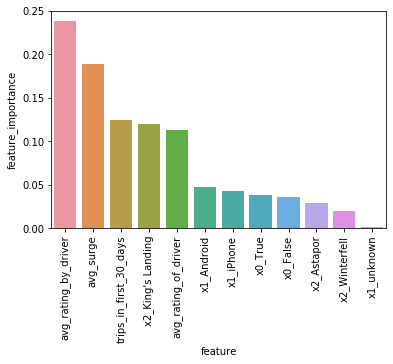

In [37]:
#get the feature importance
feature_importance = clf2.best_estimator_.steps[1][1].feature_importances_

#get the categorical name after One hot encoding transformation
cat_features = clf2.best_estimator_['preprocess'].transformers_[1][1]['ohe'].get_feature_names()

#merge the numerical and cat features
features = get_numerical+list(cat_features)

#create dataframe of feature and feature importance and sort
dataset = pd.DataFrame(feature_importance, columns = ['feature_importance'])
dataset['feature'] = pd.Series(features)
dataset = dataset.sort_values(by = 'feature_importance', ascending = False)

#plot bargraph of fetaure importance
sns.barplot(x = 'feature', y = 'feature_importance', data = dataset)
plt.xticks(rotation = 90)

## 3.
Overall the only actionable feature that would contribute widely to retention is trips in the first 30 days. The company can offer better discounts on the first 30 days so the consumer use the service more often. Rating on driver and on consumer seems to have an impact to retention. A possible solution is for drivers to attend social interaction program or assert the driver to maintain an overall good environment for passengers. Or create a rating cut off system for drivers where if they are below certain rating, they would be warn/dismissed